In [1]:
#import all necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [2]:
df = pd.read_csv('fraud.csv', chunksize=1900000)

In [3]:
for chunks in df:
    print(chunks.shape)

(1900000, 11)
(1900000, 11)
(1900000, 11)
(662620, 11)


In [4]:
df = chunks

In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5908823,404,CASH_OUT,29291.13,C1686200352,0.0,0.00,C789784120,574964.62,604255.75,0,0
6186213,567,PAYMENT,8714.11,C37624326,31350.0,22635.89,M1605346831,0.00,0.00,0,0
6179842,565,PAYMENT,6169.99,C446204087,0.0,0.00,M934652647,0.00,0.00,0,0
6320819,687,CASH_OUT,341274.37,C511400122,32512.0,0.00,C483695694,79999.80,421274.16,0,0
5825635,402,CASH_OUT,247983.20,C714613932,0.0,0.00,C1042993722,527400.78,775383.98,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662620 entries, 5700000 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            662620 non-null  int64  
 1   type            662620 non-null  object 
 2   amount          662620 non-null  float64
 3   nameOrig        662620 non-null  object 
 4   oldbalanceOrg   662620 non-null  float64
 5   newbalanceOrig  662620 non-null  float64
 6   nameDest        662620 non-null  object 
 7   oldbalanceDest  662620 non-null  float64
 8   newbalanceDest  662620 non-null  float64
 9   isFraud         662620 non-null  int64  
 10  isFlaggedFraud  662620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 55.6+ MB


In [7]:
df.duplicated().value_counts()

False    662620
Name: count, dtype: int64

In [8]:
#see statistical measures
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,662620.000000,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,662620.000000,662620.000000
mean,496.740452,1.680283e+05,7.537256e+05,7.689377e+05,1.196791e+06,1.288611e+06,0.005717,0.000018
std,101.902434,4.109657e+05,2.552330e+06,2.578379e+06,4.109849e+06,4.175612e+06,0.075392,0.004256
min,398.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,403.000000,1.305841e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,474.000000,7.065667e+04,1.593800e+04,0.000000e+00,1.075769e+05,1.854002e+05,0.000000,0.000000
75%,573.000000,2.012567e+05,1.076580e+05,1.410075e+05,9.073872e+05,1.045937e+06,0.000000,0.000000
max,743.000000,1.541594e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000,1.000000


In [9]:
df.describe(include=object)

,type,nameOrig,nameDest
count,662620,662620,662620
unique,5,662520,534705
top,PAYMENT,C1968600337,C229021471
freq,229253,2,8


In [10]:
#check null values in dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#check unique values
df.nunique()

step                 346
type                   5
amount            645631
nameOrig          662520
oldbalanceOrg     266819
newbalanceOrig    292341
nameDest          534705
oldbalanceDest    370358
newbalanceDest    397176
isFraud                2
isFlaggedFraud         2
dtype: int64

type
PAYMENT     229253
CASH_OUT    221626
CASH_IN     147763
TRANSFER     59171
DEBIT         4807
Name: count, dtype: int64


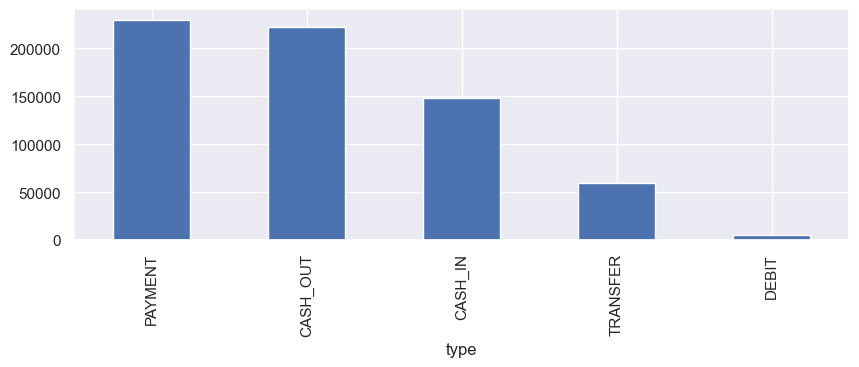

In [12]:
sns.set(rc={'figure.figsize':(10,3)})
df.type.value_counts().plot(kind='bar')
print(df.type.value_counts())

In [13]:
df = df.apply(pd.to_numeric, errors="coerce")
df.corr()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,NaN,0.010414,NaN,-0.039446,-0.041383,NaN,-0.007223,-0.007115,0.054679,0.005262
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,0.010414,NaN,1.000000,NaN,0.057252,0.012335,NaN,0.144413,0.223091,0.256199,0.055265
nameOrig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,-0.039446,NaN,0.057252,NaN,1.000000,0.995378,NaN,0.067677,0.052273,0.032013,0.014494
newbalanceOrig,-0.041383,NaN,0.012335,NaN,0.995378,1.000000,NaN,0.070311,0.051448,-0.014022,0.014323
nameDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,-0.007223,NaN,0.144413,NaN,0.067677,0.070311,NaN,1.000000,0.995306,-0.010591,-0.001239
newbalanceDest,-0.007115,NaN,0.223091,NaN,0.052273,0.051448,NaN,0.995306,1.000000,0.001883,-0.001313
isFraud,0.054679,NaN,0.256199,NaN,0.032013,-0.014022,NaN,-0.010591,0.001883,1.000000,0.056123


<Axes: >

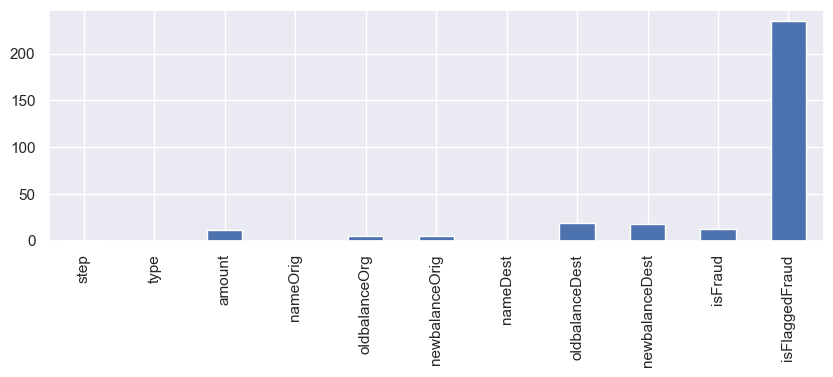

In [14]:
df_numeric = df.select_dtypes(include="number")
df_numeric.skew().plot(kind="bar")

In [15]:
print(df.columns)
df.dtypes

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


step                int64
type              float64
amount            float64
nameOrig          float64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<Axes: >

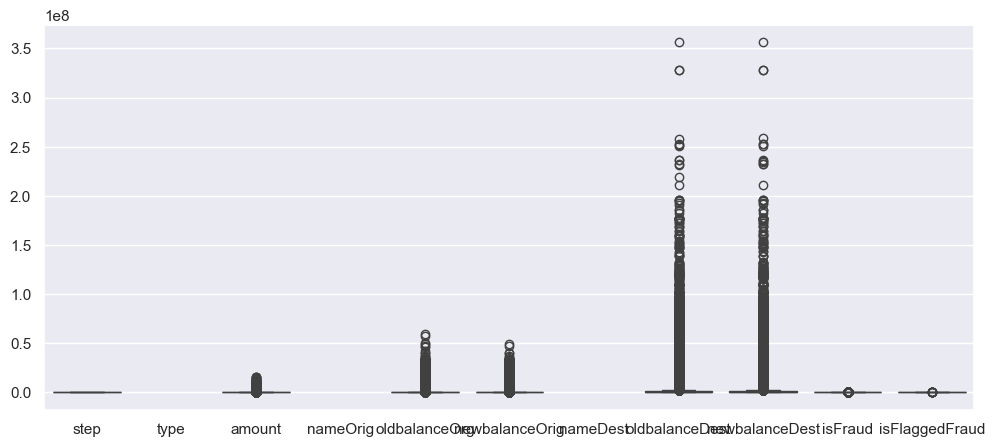

In [16]:
#Draw boxplot
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(data = df)

In [17]:
#convert categorical variable into numerical
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df['type'] = OE.fit_transform(df[['type']])


In [18]:
df = df.drop(['nameOrig','nameDest'], axis = 'columns')
df


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5700000,398,NaN,11049.92,172026.62,160976.70,0.00,0.00,0,0
5700001,398,NaN,293878.48,99129.00,0.00,73233.24,367111.73,0,0
5700002,398,NaN,128578.22,31124.00,0.00,380293.23,508871.45,0,0
5700003,398,NaN,280791.81,17022.00,297813.81,2689280.82,2408489.01,0,0
5700004,398,NaN,37678.62,297813.81,260135.20,77720.16,115398.78,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,NaN,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,NaN,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,NaN,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,NaN,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
a = df.drop(['isFraud'], axis = 'columns')
b = df['isFraud']

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. keep only numeric columns
X = df.select_dtypes(include="number")

# 2. drop empty / constant columns
X = X.dropna(axis=1, how="all")
X = X.loc[:, X.nunique() > 1]

# 3. drop rows with NaNs
X = X.dropna()

# 4. scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
# Split the data into X and y
X = a  # Exclude the 'isFraud' column from input features
y = b  # Target variable

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(530096, 8)
(132524, 8)
(530096,)
(132524,)


In [23]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9966609821617216
0.9967628505025505


In [34]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Identify only the numeric columns 
# (Logistic Regression cannot handle text columns like 'type' either)
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# 2. Create the Pipeline
# Step 1: Imputer fills the NaNs (fixes your current error)
# Step 2: Scaler puts all numbers in the same range (prevents convergence errors)
# Step 3: LogisticRegression is the actual model
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# 3. Fit the pipeline
# This will now run without the NaN error!
pipe.fit(X_train_numeric, y_train)

# 4. Print results
print(f"Train Accuracy: {pipe.score(X_train_numeric, y_train):.4f}")
print(f"Test Accuracy: {pipe.score(X_test_numeric, y_test):.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Train Accuracy: 0.9968
Test Accuracy: 0.9969


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [35]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", LogisticRegression())
])

pipe.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer()), ('model', LogisticRegression())])

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 20}


In [37]:
# Evaluate the model with the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.99835501494069


In [38]:
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test,y_pred, average = 'macro'))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy_score: 0.99835501494069
f1_score: 0.9156113831706088


array([[131766,     22],
       [   196,    540]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131788
           1       0.96      0.73      0.83       736

    accuracy                           1.00    132524
   macro avg       0.98      0.87      0.92    132524
weighted avg       1.00      1.00      1.00    132524



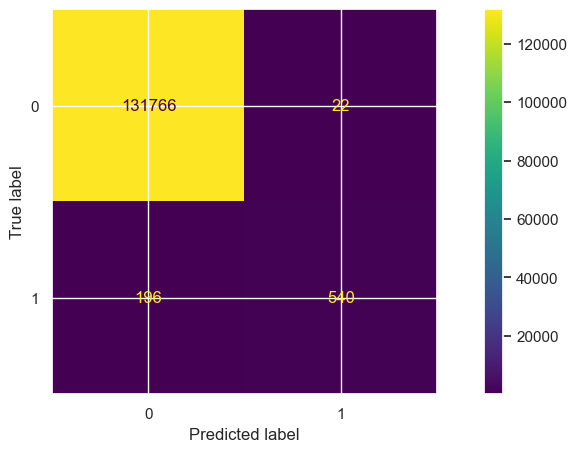

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test
)